In [17]:
# X_paths = [f"data/intermediate/siteE_Total_pearson_Aug_{i}.npy" for i in [10,5,1]]
# Y_path = "data/intermediate/labels_for_aug.npy"
# X = np.load(X_paths[0])
# Y = np.load(Y_path)
# X.shape, Y.shape
# data, train_loader, val_loader = get_data_grouped(X,Y)
# print(data[0].x.dtype, data[0].pos.dtype, data[0].edge_index.dtype, data[0].edge_attr.dtype, data[0].y.dtype)
# print(data[0])

num training examples: 2280, num validation examples: 585, total: 2865
torch.float32 torch.float32 torch.int64 torch.float32 torch.int64
Data(x=[268, 268], edge_index=[2, 64374], edge_attr=[64374, 1], y=[1], pos=[268, 268])


In [2]:
# from src.net.imports.ABIDEDataset import ABIDEDataset
# from torch_geometric.data import DataLoader
# path = 'BrainGNN_Pytorch/data/ABIDE_pcp/cpac/filt_noglobal'
# name = 'ABIDE'
# dataset = ABIDEDataset(path,name)
# dataset.data.y = dataset.data.y.squeeze()
# dataset.data.x[dataset.data.x == float('inf')] = 0
# print(dataset[0].x.dtype, dataset[0].pos.dtype, dataset[0].edge_index.dtype, dataset[0].edge_attr.dtype, dataset[0].y.dtype)
# train_loader = DataLoader(dataset,batch_size=2, shuffle= True)

/isilon/datalake/lcbn_research/final/NCANDA/berk/gnn/src/net/imports/gdc.py:13: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  return numba.jit(cache=True)(func)


torch.float32 torch.float32 torch.int64 torch.float32 torch.int64


/isilon/datalake/lcbn_research/final/software/LCBN/miniconda3/envs/gnn/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)
/isilon/datalake/lcbn_research/final/software/LCBN/miniconda3/envs/gnn/lib/python3.10/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [1]:
import os
import numpy as np
import time
import copy

from src.data import get_data_grouped, get_data

import torch
import torch.nn.functional as F
from torch.optim import lr_scheduler
from tensorboardX import SummaryWriter

from src.net.braingnn import Network
from sklearn.metrics import classification_report, confusion_matrix

from tqdm import tqdm

torch.manual_seed(123)

EPS = 1e-10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [2]:
X_path = "data/intermediate/simulated.npy"
Y_path = "data/intermediate/simulated_labels.npy"
X = np.load(X_path)
Y = np.load(Y_path)
X.shape, Y.shape
data, train_loader, val_loader = get_data(X,Y)
print(data[0].x.dtype, data[0].pos.dtype, data[0].edge_index.dtype, data[0].edge_attr.dtype, data[0].y.dtype)

num training examples: 3200, num validation examples: 800, total: 4000
torch.float32 torch.float32 torch.int64 torch.float32 torch.int64


In [3]:
for d in val_loader:
    print(d.y)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [4]:
epoch = 0
num_epoch = 50
batchSize = 32
fold = 0
lr = 0.01
stepsize = 20
gamma = 0.5
weightdecay = 5e-3
lamb0 = 1
lamb1 = 0
lamb2 = 0
lamb3 = 0.1
lamb4 = 0.1
lamb5 = 0.1
layer = 2
ratio = 0.5
indim = 30 # Change this
nroi = 30
nclass = 2
load_model = True
save_model = True
opt_method = 'Adam'
save_path = 'models/brainGNN_sim'
writer = SummaryWriter(os.path.join('./log',str(fold)))
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [5]:
############### Define Graph Deep Learning Network ##########################
model = Network(indim,ratio,nclass, R = nroi, k = 3).to(device)
print(model)

if opt_method == 'Adam':
    optimizer = torch.optim.Adam(model.parameters(), lr= lr, weight_decay=weightdecay)
elif opt_method == 'SGD':
    optimizer = torch.optim.SGD(model.parameters(), lr =lr, momentum = 0.9, weight_decay=weightdecay, nesterov = True)

scheduler = lr_scheduler.StepLR(optimizer, step_size=stepsize, gamma=gamma)

Network(
  (n1): Sequential(
    (0): Linear(in_features=30, out_features=3, bias=False)
    (1): ReLU()
    (2): Linear(in_features=3, out_features=960, bias=True)
  )
  (conv1): MyNNConv(30, 32)
  (pool1): TopKPooling(32, ratio=0.5, multiplier=1)
  (n2): Sequential(
    (0): Linear(in_features=30, out_features=3, bias=False)
    (1): ReLU()
    (2): Linear(in_features=3, out_features=1024, bias=True)
  )
  (conv2): MyNNConv(32, 32)
  (pool2): TopKPooling(32, ratio=0.5, multiplier=1)
  (fc1): Linear(in_features=128, out_features=32, bias=True)
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=32, out_features=512, bias=True)
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=512, out_features=2, bias=True)
)


In [6]:
############################### Define Other Loss Functions ########################################
def topk_loss(s,ratio):
    if ratio > 0.5:
        ratio = 1-ratio
    s = s.sort(dim=1).values
    res =  -torch.log(s[:,-int(s.size(1)*ratio):]+EPS).mean() -torch.log(1-s[:,:int(s.size(1)*ratio)]+EPS).mean()
    return res


def consist_loss(s):
    if len(s) == 0:
        return 0
    s = torch.sigmoid(s)
    W = torch.ones(s.shape[0],s.shape[0])
    D = torch.eye(s.shape[0])*torch.sum(W,dim=1)
    L = D-W
    L = L.to(device)
    res = torch.trace(torch.transpose(s,0,1) @ L @ s)/(s.shape[0]*s.shape[0])
    return res

In [7]:
###################### Network Training Function#####################################
def train(epoch):
    print('train...........')
    scheduler.step()

    for param_group in optimizer.param_groups:
        print("LR", param_group['lr'])
    model.train()
    s1_list = []
    s2_list = []
    loss_all = 0
    step = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        #print(data.x.shape, data.edge_index.shape, data.batch.shape, data.edge_attr.shape, data.pos.shape)
        output, w1, w2, s1, s2 = model(data.x, data.edge_index, data.batch, data.edge_attr, data.pos)
        s1_list.append(s1.view(-1).detach().cpu().numpy())
        s2_list.append(s2.view(-1).detach().cpu().numpy())

        loss_c = F.nll_loss(output, data.y)

        loss_p1 = (torch.norm(w1, p=2)-1) ** 2
        loss_p2 = (torch.norm(w2, p=2)-1) ** 2
        loss_tpk1 = topk_loss(s1,ratio)
        loss_tpk2 = topk_loss(s2,ratio)
        loss_consist = 0
        for c in range(nclass):
            loss_consist += consist_loss(s1[data.y == c])
        loss = lamb0*loss_c + lamb1 * loss_p1 + lamb2 * loss_p2 \
                   + lamb3 * loss_tpk1 + lamb4 *loss_tpk2 + lamb5* loss_consist
        writer.add_scalar('train/classification_loss', loss_c, epoch*len(train_loader)+step)
        writer.add_scalar('train/unit_loss1', loss_p1, epoch*len(train_loader)+step)
        writer.add_scalar('train/unit_loss2', loss_p2, epoch*len(train_loader)+step)
        writer.add_scalar('train/TopK_loss1', loss_tpk1, epoch*len(train_loader)+step)
        writer.add_scalar('train/TopK_loss2', loss_tpk2, epoch*len(train_loader)+step)
        writer.add_scalar('train/GCL_loss', loss_consist, epoch*len(train_loader)+step)
        step = step + 1

        loss.backward()
        loss_all += loss.item() * data.num_graphs
        optimizer.step()

        s1_arr = np.hstack(s1_list)
        s2_arr = np.hstack(s2_list)
    return loss_all / len(train_loader.dataset), s1_arr, s2_arr ,w1,w2

In [8]:
###################### Network Testing Function#####################################
def test_acc(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        outputs= model(data.x, data.edge_index, data.batch, data.edge_attr,data.pos)
        pred = outputs[0].max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()

    return correct / len(loader.dataset)

def test_loss(loader,epoch):
    print('testing...........')
    model.eval()
    loss_all = 0
    for data in loader:
        data = data.to(device)
        output, w1, w2, s1, s2= model(data.x, data.edge_index, data.batch, data.edge_attr,data.pos)
        loss_c = F.nll_loss(output, data.y)

        loss_p1 = (torch.norm(w1, p=2)-1) ** 2
        loss_p2 = (torch.norm(w2, p=2)-1) ** 2
        loss_tpk1 = topk_loss(s1,ratio)
        loss_tpk2 = topk_loss(s2,ratio)
        loss_consist = 0
        for c in range(nclass):
            loss_consist += consist_loss(s1[data.y == c])
        loss = lamb0*loss_c + lamb1 * loss_p1 + lamb2 * loss_p2 \
                   + lamb3 * loss_tpk1 + lamb4 *loss_tpk2 + lamb5* loss_consist

        loss_all += loss.item() * data.num_graphs
    return loss_all / len(loader.dataset)

In [9]:
#######################################################################################
############################   Model Training #########################################
#######################################################################################
best_model_wts = copy.deepcopy(model.state_dict())
best_loss = 1e10
for epoch in tqdm(range(0, num_epoch)):
    since  = time.time()
    tr_loss, s1_arr, s2_arr, w1, w2 = train(epoch)
    tr_acc = test_acc(train_loader)
    val_acc = test_acc(val_loader)
    val_loss = test_loss(val_loader,epoch)
    time_elapsed = time.time() - since
    print('*====**')
    print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Epoch: {:03d}, Train Loss: {:.7f}, '
          'Train Acc: {:.7f}, Test Loss: {:.7f}, Test Acc: {:.7f}'.format(epoch, tr_loss,
                                                       tr_acc, val_loss, val_acc))

    writer.add_scalars('Acc',{'train_acc':tr_acc,'val_acc':val_acc},  epoch)
    writer.add_scalars('Loss', {'train_loss': tr_loss, 'val_loss': val_loss},  epoch)
    writer.add_histogram('Hist/hist_s1', s1_arr, epoch)
    writer.add_histogram('Hist/hist_s2', s2_arr, epoch)

    if val_loss < best_loss and epoch > 5:
        print("saving best model")
        best_loss = val_loss
        best_model_wts = copy.deepcopy(model.state_dict())
        if save_model:
            torch.save(best_model_wts, os.path.join(save_path,str(fold)+'.pth'))

#######################################################################################
######################### Testing on testing set ######################################
#######################################################################################

if load_model:
    model = Network(indim,ratio,nclass, R = nroi, k =3).to(device)
    model.load_state_dict(torch.load(os.path.join(save_path,str(fold)+'.pth')))
    model.eval()
    preds = []
    correct = 0
    for data in val_loader:
        data = data.to(device)
        outputs= model(data.x, data.edge_index, data.batch, data.edge_attr,data.pos)
        pred = outputs[0].max(1)[1]
        preds.append(pred.cpu().detach().numpy())
        correct += pred.eq(data.y).sum().item()
    preds = np.concatenate(preds,axis=0)
    trues = np.array([example.y.cpu().detach().numpy() for example in val_loader.dataset], dtype = np.uint8)
    cm = confusion_matrix(trues,preds)
    print("Confusion matrix")
    print(classification_report(trues, preds))

else:
   model.load_state_dict(best_model_wts)
   model.eval()
   test_accuracy = test_acc(val_loader)
   test_l= test_loss(val_loader,0)
   print("===========================")
   print("Test Acc: {:.7f}, Test Loss: {:.7f} ".format(test_accuracy, test_l))
   print(opt)

  0%|                                                    | 0/50 [00:00<?, ?it/s]/isilon/datalake/lcbn_research/final/software/LCBN/miniconda3/envs/gnn/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
/isilon/datalake/lcbn_research/final/software/LCBN/miniconda3/envs/gnn/lib/python3.10/site-packages/torch_sparse/matmul.py:97: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/

train...........
LR 0.01
testing...........


  2%|▊                                         | 1/50 [01:24<1:09:16, 84.82s/it]

*====**
1m 25s
Epoch: 000, Train Loss: 0.3549234, Train Acc: 0.9987500, Test Loss: 0.3043759, Test Acc: 0.9925000
train...........
LR 0.01
testing...........


  4%|█▋                                        | 2/50 [02:49<1:07:33, 84.45s/it]

*====**
1m 24s
Epoch: 001, Train Loss: 0.2838438, Train Acc: 1.0000000, Test Loss: 0.2857170, Test Acc: 1.0000000
train...........
LR 0.01
testing...........


  6%|██▌                                       | 3/50 [04:13<1:06:11, 84.51s/it]

*====**
1m 25s
Epoch: 002, Train Loss: 0.2897270, Train Acc: 1.0000000, Test Loss: 0.2772897, Test Acc: 1.0000000
train...........
LR 0.01
testing...........


  8%|███▎                                      | 4/50 [05:37<1:04:31, 84.17s/it]

*====**
1m 24s
Epoch: 003, Train Loss: 0.2837013, Train Acc: 1.0000000, Test Loss: 0.2765642, Test Acc: 1.0000000
train...........
LR 0.01
testing...........


 10%|████▏                                     | 5/50 [07:01<1:03:14, 84.31s/it]

*====**
1m 25s
Epoch: 004, Train Loss: 0.2823916, Train Acc: 1.0000000, Test Loss: 0.2730281, Test Acc: 1.0000000
train...........
LR 0.01
testing...........


 12%|█████                                     | 6/50 [08:25<1:01:37, 84.04s/it]

*====**
1m 23s
Epoch: 005, Train Loss: 0.2816558, Train Acc: 1.0000000, Test Loss: 0.2744561, Test Acc: 1.0000000
train...........
LR 0.01
testing...........


 14%|█████▉                                    | 7/50 [09:49<1:00:09, 83.95s/it]

*====**
1m 24s
Epoch: 006, Train Loss: 0.2802653, Train Acc: 0.9996875, Test Loss: 0.2841199, Test Acc: 1.0000000
saving best model
train...........
LR 0.01
testing...........


 16%|███████                                     | 8/50 [11:12<58:44, 83.92s/it]

*====**
1m 24s
Epoch: 007, Train Loss: 0.2803519, Train Acc: 1.0000000, Test Loss: 0.2748316, Test Acc: 1.0000000
saving best model
train...........
LR 0.01
testing...........


 18%|███████▉                                    | 9/50 [12:36<57:22, 83.96s/it]

*====**
1m 24s
Epoch: 008, Train Loss: 0.2828178, Train Acc: 1.0000000, Test Loss: 0.2734080, Test Acc: 1.0000000
saving best model
train...........
LR 0.01
testing...........


 20%|████████▌                                  | 10/50 [14:00<55:48, 83.72s/it]

*====**
1m 23s
Epoch: 009, Train Loss: 0.2818608, Train Acc: 1.0000000, Test Loss: 0.2786739, Test Acc: 1.0000000
train...........
LR 0.01
testing...........


 22%|█████████▍                                 | 11/50 [15:23<54:21, 83.64s/it]

*====**
1m 23s
Epoch: 010, Train Loss: 0.2815066, Train Acc: 1.0000000, Test Loss: 0.2737440, Test Acc: 1.0000000
train...........
LR 0.01
testing...........


 24%|██████████▎                                | 12/50 [16:47<53:00, 83.71s/it]

*====**
1m 24s
Epoch: 011, Train Loss: 0.2806052, Train Acc: 1.0000000, Test Loss: 0.2727917, Test Acc: 1.0000000
saving best model
train...........
LR 0.01
testing...........


 26%|███████████▏                               | 13/50 [18:09<51:20, 83.26s/it]

*====**
1m 22s
Epoch: 012, Train Loss: 0.2827597, Train Acc: 1.0000000, Test Loss: 0.2753450, Test Acc: 1.0000000
train...........
LR 0.01
testing...........


 28%|████████████                               | 14/50 [19:35<50:29, 84.15s/it]

*====**
1m 26s
Epoch: 013, Train Loss: 0.3010444, Train Acc: 0.4971875, Test Loss: 3.8186395, Test Acc: 0.5112500
train...........
LR 0.01
testing...........


 30%|████████████▉                              | 15/50 [21:00<49:04, 84.14s/it]

*====**
1m 24s
Epoch: 014, Train Loss: 0.3023470, Train Acc: 1.0000000, Test Loss: 0.2785918, Test Acc: 1.0000000
train...........
LR 0.01
testing...........


 32%|█████████████▊                             | 16/50 [22:23<47:30, 83.84s/it]

*====**
1m 23s
Epoch: 015, Train Loss: 0.2978334, Train Acc: 1.0000000, Test Loss: 0.2757992, Test Acc: 1.0000000
train...........
LR 0.01
testing...........


 34%|██████████████▌                            | 17/50 [23:47<46:10, 83.96s/it]

*====**
1m 24s
Epoch: 016, Train Loss: 0.2947561, Train Acc: 0.9978125, Test Loss: 0.2888053, Test Acc: 0.9987500
train...........
LR 0.01
testing...........


 36%|███████████████▍                           | 18/50 [25:11<44:43, 83.87s/it]

*====**
1m 24s
Epoch: 017, Train Loss: 0.2882331, Train Acc: 1.0000000, Test Loss: 0.2725222, Test Acc: 1.0000000
saving best model
train...........
LR 0.01
testing...........


 38%|████████████████▎                          | 19/50 [26:35<43:24, 84.01s/it]

*====**
1m 24s
Epoch: 018, Train Loss: 0.2942500, Train Acc: 0.8509375, Test Loss: 0.6067780, Test Acc: 0.8400000
train...........
LR 0.005
testing...........


 40%|█████████████████▏                         | 20/50 [27:59<41:58, 83.94s/it]

*====**
1m 24s
Epoch: 019, Train Loss: 0.2901023, Train Acc: 1.0000000, Test Loss: 0.2726586, Test Acc: 1.0000000
train...........
LR 0.005
testing...........


 42%|██████████████████                         | 21/50 [29:23<40:36, 84.01s/it]

*====**
1m 24s
Epoch: 020, Train Loss: 0.2920216, Train Acc: 1.0000000, Test Loss: 0.2727059, Test Acc: 1.0000000
train...........
LR 0.005
testing...........


 44%|██████████████████▉                        | 22/50 [30:47<39:14, 84.08s/it]

*====**
1m 24s
Epoch: 021, Train Loss: 0.2912413, Train Acc: 1.0000000, Test Loss: 0.2730627, Test Acc: 1.0000000
train...........
LR 0.005
testing...........


 46%|███████████████████▊                       | 23/50 [32:11<37:51, 84.14s/it]

*====**
1m 24s
Epoch: 022, Train Loss: 0.2870683, Train Acc: 1.0000000, Test Loss: 0.2729371, Test Acc: 1.0000000
train...........
LR 0.005
testing...........


 48%|████████████████████▋                      | 24/50 [33:35<36:24, 84.02s/it]

*====**
1m 24s
Epoch: 023, Train Loss: 0.2872020, Train Acc: 1.0000000, Test Loss: 0.2734885, Test Acc: 1.0000000
train...........
LR 0.005
testing...........


 50%|█████████████████████▌                     | 25/50 [34:59<34:59, 83.98s/it]

*====**
1m 24s
Epoch: 024, Train Loss: 0.2852886, Train Acc: 1.0000000, Test Loss: 0.2739827, Test Acc: 1.0000000
train...........
LR 0.005
testing...........


 52%|██████████████████████▎                    | 26/50 [36:23<33:36, 84.02s/it]

*====**
1m 24s
Epoch: 025, Train Loss: 0.2835697, Train Acc: 0.9596875, Test Loss: 0.3792204, Test Acc: 0.9625000
train...........
LR 0.005
testing...........


 54%|███████████████████████▏                   | 27/50 [37:48<32:15, 84.16s/it]

*====**
1m 24s
Epoch: 026, Train Loss: 0.2902931, Train Acc: 1.0000000, Test Loss: 0.2731194, Test Acc: 1.0000000
train...........
LR 0.005
testing...........


 56%|████████████████████████                   | 28/50 [39:12<30:52, 84.20s/it]

*====**
1m 24s
Epoch: 027, Train Loss: 0.2836728, Train Acc: 0.9984375, Test Loss: 0.2873803, Test Acc: 0.9987500
train...........
LR 0.005
testing...........


 58%|████████████████████████▉                  | 29/50 [40:36<29:25, 84.07s/it]

*====**
1m 24s
Epoch: 028, Train Loss: 0.2906398, Train Acc: 0.8209375, Test Loss: 0.6300485, Test Acc: 0.8075000
train...........
LR 0.005
testing...........


 60%|█████████████████████████▊                 | 30/50 [42:00<28:03, 84.16s/it]

*====**
1m 24s
Epoch: 029, Train Loss: 0.2873565, Train Acc: 1.0000000, Test Loss: 0.2735180, Test Acc: 1.0000000
train...........
LR 0.005
testing...........


 62%|██████████████████████████▋                | 31/50 [43:25<26:45, 84.50s/it]

*====**
1m 25s
Epoch: 030, Train Loss: 0.2897810, Train Acc: 1.0000000, Test Loss: 0.2748016, Test Acc: 1.0000000
train...........
LR 0.005
testing...........


 64%|███████████████████████████▌               | 32/50 [44:50<25:21, 84.51s/it]

*====**
1m 25s
Epoch: 031, Train Loss: 0.2880240, Train Acc: 1.0000000, Test Loss: 0.2746967, Test Acc: 1.0000000
train...........
LR 0.005
testing...........


 66%|████████████████████████████▍              | 33/50 [46:14<23:56, 84.49s/it]

*====**
1m 24s
Epoch: 032, Train Loss: 0.2871336, Train Acc: 1.0000000, Test Loss: 0.2725882, Test Acc: 1.0000000
train...........
LR 0.005
testing...........


 68%|█████████████████████████████▏             | 34/50 [47:38<22:30, 84.39s/it]

*====**
1m 24s
Epoch: 033, Train Loss: 0.2841243, Train Acc: 1.0000000, Test Loss: 0.2728500, Test Acc: 1.0000000
train...........
LR 0.005
testing...........


 70%|██████████████████████████████             | 35/50 [49:02<21:01, 84.13s/it]

*====**
1m 23s
Epoch: 034, Train Loss: 0.2840514, Train Acc: 1.0000000, Test Loss: 0.2735100, Test Acc: 1.0000000
train...........
LR 0.005
testing...........


 72%|██████████████████████████████▉            | 36/50 [50:26<19:36, 84.03s/it]

*====**
1m 24s
Epoch: 035, Train Loss: 0.2951676, Train Acc: 1.0000000, Test Loss: 0.2737916, Test Acc: 1.0000000
train...........
LR 0.005
testing...........


 74%|███████████████████████████████▊           | 37/50 [51:50<18:13, 84.15s/it]

*====**
1m 24s
Epoch: 036, Train Loss: 0.2890276, Train Acc: 1.0000000, Test Loss: 0.2768392, Test Acc: 1.0000000
train...........
LR 0.005
testing...........


 76%|████████████████████████████████▋          | 38/50 [53:14<16:48, 84.05s/it]

*====**
1m 24s
Epoch: 037, Train Loss: 0.2873326, Train Acc: 0.9800000, Test Loss: 0.3503828, Test Acc: 0.9712500
train...........
LR 0.005
testing...........


 78%|█████████████████████████████████▌         | 39/50 [54:40<15:30, 84.59s/it]

*====**
1m 26s
Epoch: 038, Train Loss: 0.2925406, Train Acc: 1.0000000, Test Loss: 0.2741944, Test Acc: 1.0000000
train...........
LR 0.0025
testing...........


 80%|██████████████████████████████████▍        | 40/50 [56:04<14:03, 84.38s/it]

*====**
1m 24s
Epoch: 039, Train Loss: 0.2861013, Train Acc: 1.0000000, Test Loss: 0.2744457, Test Acc: 1.0000000
train...........
LR 0.0025
testing...........


 82%|███████████████████████████████████▎       | 41/50 [57:28<12:38, 84.24s/it]

*====**
1m 24s
Epoch: 040, Train Loss: 0.2841186, Train Acc: 1.0000000, Test Loss: 0.2740462, Test Acc: 1.0000000
train...........
LR 0.0025
testing...........


 84%|████████████████████████████████████       | 42/50 [58:52<11:13, 84.16s/it]

*====**
1m 24s
Epoch: 041, Train Loss: 0.2834029, Train Acc: 1.0000000, Test Loss: 0.2734129, Test Acc: 1.0000000
train...........
LR 0.0025
testing...........


 86%|███████████████████████████████████▎     | 43/50 [1:00:16<09:48, 84.12s/it]

*====**
1m 24s
Epoch: 042, Train Loss: 0.2948051, Train Acc: 1.0000000, Test Loss: 0.2734307, Test Acc: 1.0000000
train...........
LR 0.0025
testing...........


 88%|████████████████████████████████████     | 44/50 [1:01:41<08:26, 84.45s/it]

*====**
1m 25s
Epoch: 043, Train Loss: 0.2924775, Train Acc: 1.0000000, Test Loss: 0.2735408, Test Acc: 1.0000000
train...........
LR 0.0025
testing...........


 90%|████████████████████████████████████▉    | 45/50 [1:03:06<07:02, 84.50s/it]

*====**
1m 25s
Epoch: 044, Train Loss: 0.2955792, Train Acc: 0.9990625, Test Loss: 0.2860202, Test Acc: 1.0000000
train...........
LR 0.0025
testing...........


 92%|█████████████████████████████████████▋   | 46/50 [1:04:30<05:37, 84.38s/it]

*====**
1m 24s
Epoch: 045, Train Loss: 0.2918843, Train Acc: 1.0000000, Test Loss: 0.2730324, Test Acc: 1.0000000
train...........
LR 0.0025
testing...........


 94%|██████████████████████████████████████▌  | 47/50 [1:05:54<04:13, 84.43s/it]

*====**
1m 24s
Epoch: 046, Train Loss: 0.2982701, Train Acc: 1.0000000, Test Loss: 0.2723415, Test Acc: 1.0000000
saving best model
train...........
LR 0.0025
testing...........


 96%|███████████████████████████████████████▎ | 48/50 [1:07:19<02:48, 84.44s/it]

*====**
1m 24s
Epoch: 047, Train Loss: 0.2942685, Train Acc: 1.0000000, Test Loss: 0.2735231, Test Acc: 1.0000000
train...........
LR 0.0025
testing...........


 98%|████████████████████████████████████████▏| 49/50 [1:08:43<01:24, 84.30s/it]

*====**
1m 24s
Epoch: 048, Train Loss: 0.3009625, Train Acc: 1.0000000, Test Loss: 0.2734786, Test Acc: 1.0000000
train...........
LR 0.0025
testing...........


100%|█████████████████████████████████████████| 50/50 [1:10:07<00:00, 84.15s/it]

*====**
1m 24s
Epoch: 049, Train Loss: 0.3052767, Train Acc: 1.0000000, Test Loss: 0.2732146, Test Acc: 1.0000000


Confusion matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       1.00      1.00      1.00       391

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [11]:
print(model)

Network(
  (n1): Sequential(
    (0): Linear(in_features=30, out_features=3, bias=False)
    (1): ReLU()
    (2): Linear(in_features=3, out_features=960, bias=True)
  )
  (conv1): MyNNConv(30, 32)
  (pool1): TopKPooling(32, ratio=0.5, multiplier=1)
  (n2): Sequential(
    (0): Linear(in_features=30, out_features=3, bias=False)
    (1): ReLU()
    (2): Linear(in_features=3, out_features=1024, bias=True)
  )
  (conv2): MyNNConv(32, 32)
  (pool2): TopKPooling(32, ratio=0.5, multiplier=1)
  (fc1): Linear(in_features=128, out_features=32, bias=True)
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=32, out_features=512, bias=True)
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=512, out_features=2, bias=True)
)


In [20]:
for name, param in model.named_parameters():
    print(param)

Parameter containing:
tensor([[-2.3255e-41,  1.1734e-41,  3.2900e-41,  3.3522e-41, -4.2237e-41,
          3.9100e-41, -1.8960e-41, -2.5406e-42,  2.0054e-41, -1.1526e-41,
         -1.6115e-43, -3.7081e-41, -4.8094e-41, -1.2750e-41, -1.3672e-41,
         -1.4742e-41, -1.6080e-41, -4.5609e-41, -6.8930e-42, -5.4527e-41,
          4.1513e-41,  9.1225e-42,  8.0364e-42, -1.0144e-41,  3.2880e-41,
          3.1427e-41, -3.4905e-41, -4.0022e-41,  3.6214e-41, -3.4521e-41],
        [-2.6891e-42,  1.6684e-41, -1.5241e-41, -2.7984e-42,  8.9292e-41,
         -9.4097e-42, -1.8546e-40, -5.4404e-41, -2.9713e-41,  6.5132e-42,
          1.5014e-40,  8.9623e-41, -3.8115e-41,  1.7742e-41,  1.0363e-40,
         -4.5291e-41, -3.6514e-41, -5.0712e-41, -1.1803e-41, -6.1825e-42,
          3.3193e-39,  6.9152e-39,  1.4285e-40, -9.6657e-41, -4.0087e-41,
          8.9346e-40,  1.0078e-39,  4.1560e-41,  2.5691e-40,  2.2647e-40],
        [-1.2163e-40,  3.0323e-41,  5.7439e-42, -1.0812e-41, -4.2947e-41,
         -2.12

In [48]:
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.7/221.7 kB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 77.4 MB/s eta 0:00:000m eta 0:00:010:00:01
  Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)


In [59]:
import matplotlib.pyplot as plt
import numpy as np
#from skimage.io import imread, savemat
from scipy.io import savemat

In [64]:
d = {}
for name, t in model.conv1.state_dict().items():
    print(name)
    arr = t.numpy()
    if name == "nn.0.weight":
        #savemat("conv1alpha.tif",arr)
        d["alpha1"] = arr.copy()
    if name == "nn.2.weight":
        #savemat(arr, "conv1beta.tif",arr)
        d["beta1"]=arr.copy()
for name, t in model.conv2.state_dict().items():
    arr = t.numpy()
    if name == "nn.0.weight":
        #savemat(arr, "conv2alpha.tif",arr)
        d["alpha2"] = arr.copy()
    if name == "nn.2.weight":
        #savemat(arr, "conv2beta.tif",arr)
        d["beta2"] = arr.copy()
savemat("simulation_weights.mat", d)
d
        

bias
nn.0.weight
nn.2.weight
nn.2.bias


{'alpha1': array([[-2.325455e-41,  1.173447e-41,  3.289969e-41,  3.352186e-41,
         -4.223654e-41,  3.910043e-41, -1.895957e-41, -2.540554e-42,
          2.005398e-41, -1.152568e-41, -1.611493e-43, -3.708116e-41,
         -4.809396e-41, -1.275041e-41, -1.367247e-41, -1.474166e-41,
         -1.607990e-41, -4.560946e-41, -6.892987e-42, -5.452733e-41,
          4.151347e-41,  9.122453e-42,  8.036447e-42, -1.014400e-41,
          3.288007e-41,  3.142692e-41, -3.490494e-41, -4.002249e-41,
          3.621376e-41, -3.452099e-41],
        [-2.689092e-42,  1.668386e-41, -1.524052e-41, -2.798393e-42,
          8.929214e-41, -9.409719e-42, -1.854619e-40, -5.440401e-41,
         -2.971313e-41,  6.513235e-42,  1.501393e-40,  8.962285e-41,
         -3.811532e-41,  1.774184e-41,  1.036260e-40, -4.529137e-41,
         -3.651363e-41, -5.071159e-41, -1.180314e-41, -6.182529e-42,
          3.319345e-39,  6.915237e-39,  1.428512e-40, -9.665736e-41,
         -4.008695e-41,  8.934609e-40,  1.007833e-39,

[[-0.07140078  0.05467945 -0.7055184 ]
 [-0.95947665 -0.02671944 -0.02042726]
 [-0.023392   -0.02111588  0.00990349]
 [-0.04192687  0.08855317  0.07583212]
 [ 0.47211885  1.          0.0365178 ]
 [ 0.436153   -0.03381063 -0.09987594]
 [-0.05558359  0.02404908 -0.08670809]
 [-0.04998003  0.01477113  0.0348094 ]
 [ 0.02237221  0.59040874 -0.01537564]
 [-0.05446919  0.06046174  0.03293278]
 [-0.04041822  0.07826069  0.00328014]
 [-0.09131289  0.0339841  -0.03225467]
 [-0.01857693 -0.02550516 -0.03064615]
 [-0.03626548  0.07120629  0.04280998]
 [-0.00216047  0.01563847  0.03378961]
 [-0.05245064  0.0138775  -0.053728  ]
 [-0.07938035 -0.10636788 -0.04038142]
 [-0.10351878 -0.05465842 -0.00603461]
 [-0.08116235 -0.0299733   0.30367544]
 [-0.9813442   0.04828739  0.04358271]
 [-0.05866398  0.04092285  0.43338275]
 [ 0.37483442 -0.06234887 -0.08533611]
 [-0.00372169  0.01671082 -0.03038331]
 [-0.02635148 -0.02636725  0.38503754]
 [ 0.00633424 -0.06358418 -0.06969764]
 [-0.04340398  0.02294518

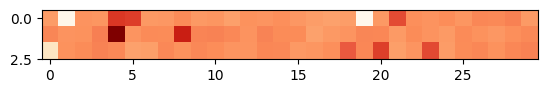

In [46]:
for name, t in model.conv2.state_dict().items():
    if name == "nn.0.weight":
        arr = t.numpy()
        #print(arr)
        arr = arr/arr.max()
        print(arr.T)
        print(np.argmax((arr.T), axis =1))
        plt.imshow(arr, cmap = "OrRd")
        plt.show()